In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\doug\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]
X_values= selected_features
X_values.head()
print(X_values.shape)

(6991, 40)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
Y_value= df['koi_disposition']
# Makes one column for and conpikes all the rows above
print(Y_value.shape)

(6991,)


In [7]:
# Train Test Split the data

# Takes out data to test this model and not over-train the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_values, Y_value, random_state=42)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale your data and independent variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler= scaler.fit(X_train)
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

# Train the Model



In [23]:
# Find which K values have the highest accuracy

train_scores = []
test_scores = []

# 1-20 only odd numbers
k_range = range(1, 20, 2)

for k in k_range:
    # Create the classifier for each value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Score with both test and train data
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    
    # Append the scores to our list of scores
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train Score: {train_score}, Test Score: {test_score:}")

k: 1, Train Score: 1.0, Test Score: 0.790045766590389
k: 3, Train Score: 0.8966240701888232, Test Score: 0.8112128146453089
k: 5, Train Score: 0.8777417509059698, Test Score: 0.8197940503432495
k: 7, Train Score: 0.8661071905397673, Test Score: 0.8232265446224256
k: 9, Train Score: 0.855807743658211, Test Score: 0.8278032036613272
k: 11, Train Score: 0.8481785237459469, Test Score: 0.8278032036613272
k: 13, Train Score: 0.8485599847415601, Test Score: 0.8220823798627003
k: 15, Train Score: 0.8409307648292962, Test Score: 0.8243707093821511
k: 17, Train Score: 0.8382605378600038, Test Score: 0.8272311212814645
k: 19, Train Score: 0.8363532328819379, Test Score: 0.8243707093821511


In [24]:
# Create the Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train_scaled, y_train)

In [25]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Best Testing Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.898741418764302


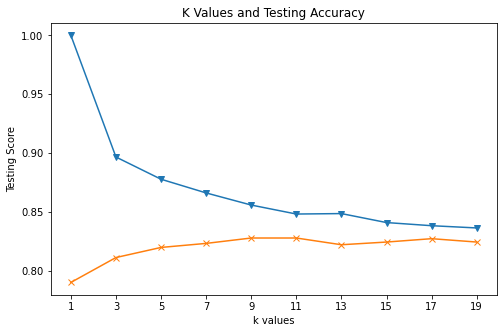

In [43]:
# Make a graph of the K values

plt.figure(figsize=(8,5))
plt.plot(k_range, train_scores, marker='v')
plt.plot(k_range, test_scores, marker='x')
plt.xticks(k_range)
plt.xlabel("k values")
plt.ylabel("Testing Score")
plt.title("K Values and Testing Accuracy")
plt.show()

In [42]:
# Get the best k value and fit the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.828


In [28]:
# Random Forests calculates feature importance
importances = rf.feature_importances_
importances

array([0.09680234, 0.07193538, 0.11021997, 0.03349881, 0.02295728,
       0.01654521, 0.0161336 , 0.01316508, 0.02237591, 0.02536007,
       0.01764724, 0.0110377 , 0.01105219, 0.02328746, 0.0342808 ,
       0.03347834, 0.02604269, 0.01283084, 0.01308259, 0.0452159 ,
       0.03296788, 0.03182987, 0.01483208, 0.01434641, 0.01540341,
       0.01406176, 0.05187087, 0.00299238, 0.00992812, 0.03549316,
       0.03003523, 0.00935662, 0.00878234, 0.0098043 , 0.00919873,
       0.01046362, 0.00861388, 0.01145242, 0.01144894, 0.01016857])

In [29]:
# Sort the features by their importance, highest to lowest
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.11021997282889073, 'koi_fpflag_co'),
 (0.09680234378542409, 'koi_fpflag_nt'),
 (0.07193537724700035, 'koi_fpflag_ss'),
 (0.051870865007269146, 'koi_model_snr'),
 (0.04521589608033703, 'koi_prad'),
 (0.03549315941042421, 'koi_steff_err1'),
 (0.034280795993557635, 'koi_duration_err1'),
 (0.033498813338538144, 'koi_fpflag_ec'),
 (0.03347833842794456, 'koi_duration_err2'),
 (0.03296788155498093, 'koi_prad_err1'),
 (0.031829873322947726, 'koi_prad_err2'),
 (0.03003523010092778, 'koi_steff_err2'),
 (0.02604268870325612, 'koi_depth'),
 (0.025360068227101896, 'koi_time0bk_err2'),
 (0.02328745803954034, 'koi_duration'),
 (0.02295728224433481, 'koi_period'),
 (0.02237590991588637, 'koi_time0bk_err1'),
 (0.017647236989997605, 'koi_impact'),
 (0.016545210468608084, 'koi_period_err1'),
 (0.016133604225035684, 'koi_period_err2'),
 (0.015403406214442035, 'koi_insol_err1'),
 (0.014832084572798039, 'koi_teq'),
 (0.014346405110140426, 'koi_insol'),
 (0.014061757731755116, 'koi_insol_err2'),
 (0.0131

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [30]:
# Create the GridSearchCV model
knn_range=list(range(1,20,2))
param_grid = dict(n_neighbors=knn_range)

In [31]:
# Train the model with GridSearch
grid2 = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='accuracy')

In [32]:
print(f" Best Params: {grid2.best_params_}")
print(f" Best Test Score: {grid2.best_score_}")

 Best Params: {'n_neighbors': 19}
 Best Test Score: 0.82128217349857


In [33]:
test_accuracy=grid2.score(X_test_scaled, y_test)
print(f" Best Test Data Accuracy: {test_accuracy}")

 Best Test Data Accuracy: 0.8243707093821511


In [37]:
predictions =grid2.predict(X_test_scaled)
actual_values= y_test.unique().tolist()

In [35]:
# Actual vs Predictions DataFrame

actual_predict = {'Actual': y_test,
                        'Predication' : predictions}
AP_df = pd.DataFrame(actual_predict)
AP_df

,Actual,Predication
4982,FALSE POSITIVE,FALSE POSITIVE
4866,CANDIDATE,CANDIDATE
2934,FALSE POSITIVE,FALSE POSITIVE
5007,FALSE POSITIVE,FALSE POSITIVE
3869,FALSE POSITIVE,FALSE POSITIVE
...,...,...
4006,CANDIDATE,CANDIDATE
6985,CANDIDATE,CANDIDATE
1468,CONFIRMED,CONFIRMED
5138,CONFIRMED,CANDIDATE


In [40]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.69      0.52      0.59       411
     CONFIRMED       0.66      0.78      0.72       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.82      1748
     macro avg       0.78      0.76      0.76      1748
  weighted avg       0.82      0.82      0.82      1748



# Save the Model

In [36]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn_MS.sav'
joblib.dump(knn, filename)

['knn_MS.sav']

# Conclusions

The f1-score of FALSE POSITIVE for Random Forest model is 0.99 meaning it can predict FALSE POSITIVE very well and reliably.

Random Forest's best testing score (0.898741418764302) is better than the SVM model (0.82128217349857).